In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from scipy import integrate

In [2]:
def load_xvg_file(filename):
    x, y = [], []
    with open(filename) as f:
        for line in f:
            cols = line.split()
            if len(cols)==2:
                x.append(cols[0])
                y.append(cols[1])
    return np.array(x[1:],dtype=float),np.array(y[1:],dtype=float) #skip the first value (header)


In [99]:
def structure_factor(r,dr,gr,q): 
    return r*(gr-1)*np.sin(q*r)*dr/q

def get_Sq_from_gr(r,gr): 
    #a = #5e2 
    sq = np.zeros(len(r))
    q = np.linspace(0.0, 2.0*np.pi/(r[1]-r[0])/10, len(r))
    dr = r[1]-r[0]
    for i in range(len(r)):
        sq[i] = np.sum(structure_factor(r,dr,gr,q[i]))  
   
    # normalise and crop the loq q's
    xmin = 13
    q = q[xmin:]
    sq = sq[xmin:]/abs(min(sq[xmin:]))+1
    return q,sq

In [125]:
def gaussian(x,a,b,c,d):
    return np.abs(a)*np.exp(-4*np.log(2)*(x-b)**2./(c**2))+d

def linear(x,a,b):
    return a*x+b

def fit(function,x,y,p0=None,sigma=None,bounds=None):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma)
    curve = function(x,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,x,curve,perr

/var/folders/fn/0pyqzqf1011194prgzt7vly80000gn/T/ipykernel_61526/1102297472.py:2: RuntimeWarning: invalid value encountered in true_divide
  return r*(gr-1)*np.sin(q*r)*dr/q
/var/folders/fn/0pyqzqf1011194prgzt7vly80000gn/T/ipykernel_61526/1102297472.py:2: RuntimeWarning: invalid value encountered in true_divide
  return r*(gr-1)*np.sin(q*r)*dr/q


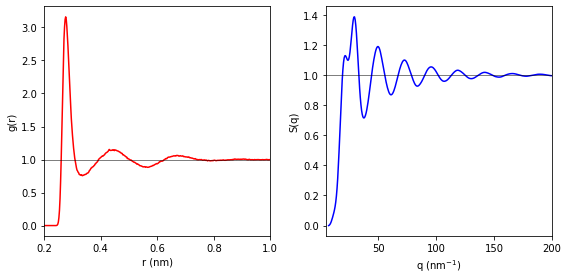

In [126]:
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
filename = "rdf.xvg"
x,y = load_xvg_file(filename)
plt.plot(x,y, c= 'red',ls='-')
plt.ylabel('g(r)')
plt.xlabel('r (nm)')
plt.xlim(0.2,1)
#plt.grid()
plt.axhline(y=1,c= 'black',lw=1,alpha=0.5)

plt.subplot(1,2,2)
q,sq = get_Sq_from_gr(x,y)
plt.plot(q,sq,c= 'blue')

q,sq = get_Sq_from_gr(x,gaussian_filter(y,sigma=20))
plt.axhline(y=1,c= 'black',lw=1,alpha=0.5)
plt.ylabel('S(q)')
plt.xlabel(r'q (nm$^{-1}$)')
plt.xlim(5,200)
plt.tight_layout()
plt.savefig("/Users/fivos/Desktop/fig.png")

0.20301975155680732
literature value: 0.21 A^2/ps


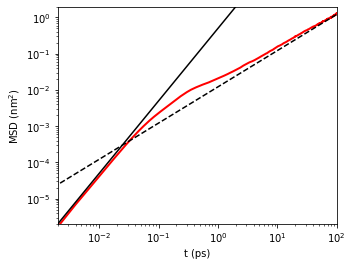

In [146]:
plt.figure(figsize=[5,4])

filename = "msd.xvg"
x,y = load_xvg_file(filename)
plt.plot(x,y,c= 'red',lw=2)
plt.ylabel(r'MSD (nm$^2$)')
plt.xlabel('t (ps)')

xmin,xmax = 1000,-1
popt,xf,yf,perr = fit(linear,x[xmin:xmax],y[xmin:xmax])
#plt.plot(xf,yf,c='black')
D = popt[0]/6
plt.plot(x,x*D*6,ls='--',c='black')
plt.plot(x,x*x/2,ls='-',c='black')
print(D/1e-2)
print('literature value: 0.21 A^2/ps') #http://www.sklogwiki.org/SklogWiki/index.php/TIP4P/2005_model_of_water
plt.xlim(2e-3,100)
plt.ylim(2e-6,2)
#filename = "diff_mol.xvg"
#x,y = load_xvg_file(filename)
#plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.savefig("/Users/fivos/Desktop/fig.png")

0.005253255555555556


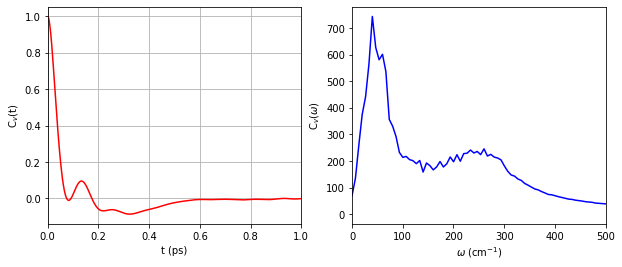

In [96]:
#velocity autocorellation
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
filename = "vac.xvg"
x,y = load_xvg_file(filename)

plt.plot(x,y, c= 'red',ls='-')
plt.ylabel(r'C$_v$(t)')
plt.xlabel('t (ps)')
plt.xlim([0,1])
plt.grid()

D = integrate.simps(y, x=x)/3
print(D)

plt.subplot(1,2,2)
filename = "spectrum.xvg"
x,y = load_xvg_file(filename)
plt.plot(x,y,'-', c= 'blue')
#plt.plot(x,gaussian_filter(y,sigma=1),'-', c= 'blue',ls='-')
plt.ylabel(r'C$_v$($\omega$)')
plt.xlabel(r'$\omega$ (cm$^{-1}$)')
plt.xlim([0,500])
plt.savefig("/Users/fivos/Desktop/fig.eps")

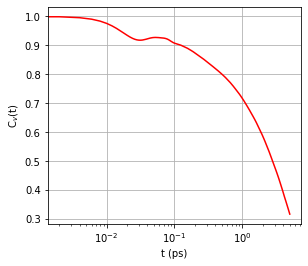

In [11]:
# dipole autocorrelation 
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
filename = "dipcorr.xvg"
x,y = load_xvg_file(filename)

plt.plot(x,y, c= 'red',ls='-')
plt.ylabel(r'C$_v$(t)')
plt.xlabel('t (ps)')
#plt.xlim([0,1])
plt.xscale('log')
plt.grid()